# KAGGLE - RAIN IN AUSTRALIA

Import all libraries necessary for my project:

In [363]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_curve, roc_auc_score, auc,
    confusion_matrix, ConfusionMatrixDisplay,
    precision_recall_curve, f1_score, average_precision_score,
    classification_report
)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedShuffleSplit
# models simples
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# models ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Other imports
import time
import random
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import math
from sklearn import metrics
from sklearn.decomposition import PCA

Loading the dataset:

In [364]:
raindf = pd.read_csv('weatherAUS.csv')
raindf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Lets see what type of Data we have for each column:

In [365]:
t=raindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Now lets breakdown the dataset and see diferent properties of each column:

In [366]:
d = raindf.describe()
d

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Lets see if we have any NaNs in our dataset:

In [367]:
nan_count = raindf.isnull().sum()
nan_percentage = raindf.isnull().mean() * 100
print("Número de NaNs por columna:")
print(nan_count)
print("\nPorcentaje de NaNs por columna:")
print(nan_percentage)

Número de NaNs por columna:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Porcentaje de NaNs por columna:
Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3

### Exploratory analysis and plots

Lets see how much rainfall has every month with random years:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

<Figure size 1000x800 with 0 Axes>

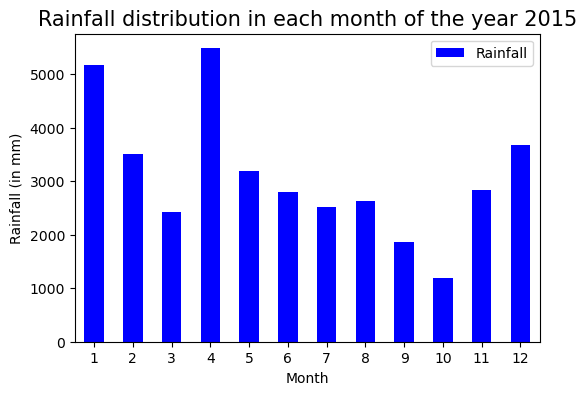

In [368]:
# Convert 'Date' column to datetime format
raindf['Date'] = pd.to_datetime(raindf['Date'], errors='coerce')
# Create a new DataFrame with 'Year', 'Month', and 'Rainfall' columns
rainfall =[raindf['Date'].dt.year, raindf['Date'].dt.month, raindf['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rainfall_df = pd.concat(rainfall, axis=1, keys=headers)
# Select a random year between 2008 and 2017
year = random.randint(2007, 2017)
# Filter the DataFrame for the selected year
rainfall_df_year = rainfall_df[rainfall_df['Year'] == year]
# Create a bar plot of the total rainfall for each month of the selected year
plt.figure(figsize=(10,8))
a = rainfall_df_year.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='blue')
# Set the title, labels, and x-ticks
plt.title(f'Rainfall distribution in each month of the year {year}', fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Rainfall (in mm)', fontsize=10)
plt.xticks(rotation=0)

Now, lets see the minimum and maximum temperature in each city of Australia:

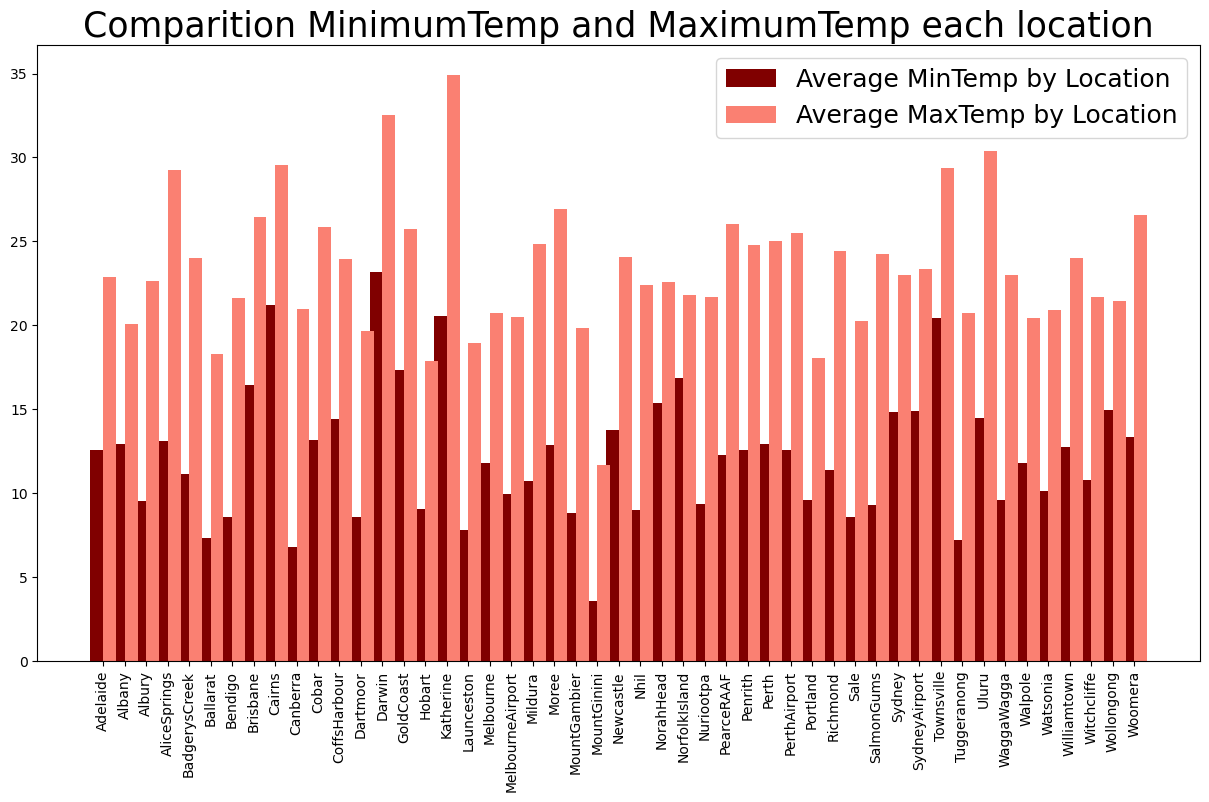

In [369]:
# Group by 'Location' and calculate mean of 'MinTemp' and 'MaxTemp' in one go
grouped = raindf.groupby('Location').agg({'MinTemp':'mean', 'MaxTemp':'mean'})
# Get unique locations and number of unique locations
loc = grouped.index
n = len(loc)
# Create x values for bar plot
x = np.arange(n)
# Set figure size
plt.rcParams["figure.figsize"] = (15,8)
# Create figure and axes
fig, ax = plt.subplots()
# Width of the bars
w = 0.6
# Create bar plots
ax.bar(x-w/2, grouped['MinTemp'], label='Average MinTemp by Location', color='maroon', width=w)
ax.bar(x+w/2, grouped['MaxTemp'], label='Average MaxTemp by Location', color='salmon', width=w)
# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(loc, rotation=90)
# Set title and legend
plt.title("Comparition MinimumTemp and MaximumTemp each location", fontsize=25)
plt.legend(fontsize=18)

Finally lets see the distribution of our target:

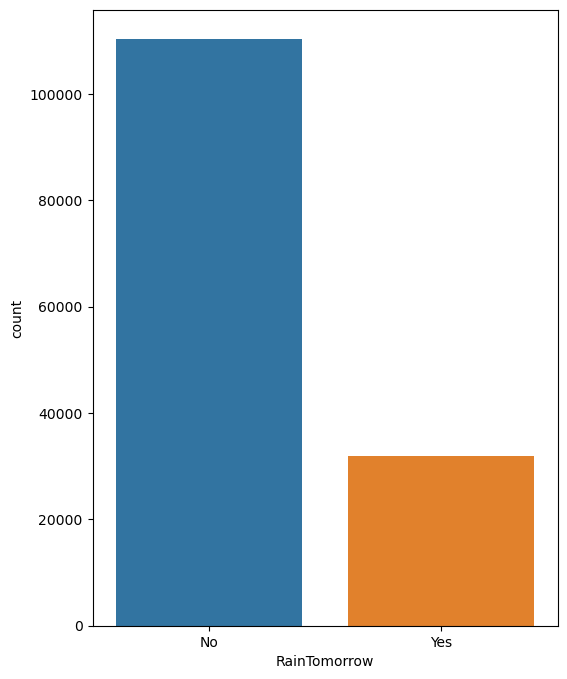

In [370]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=raindf)
plt.show()

Text(0.5, 1.0, 'Rain Today vs Rain Tomorrow')

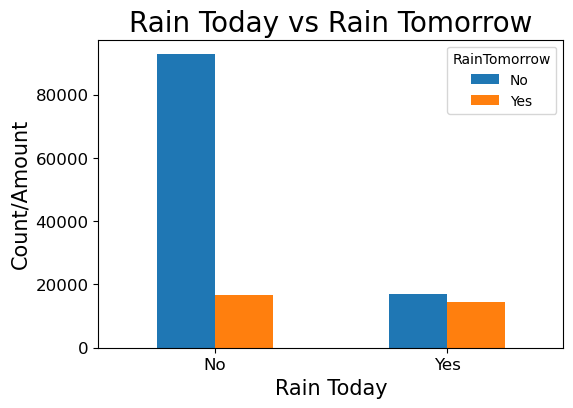

In [371]:
comp = pd.crosstab(raindf['RainToday'], raindf['RainTomorrow'])

plt.rcParams["figure.figsize"] = (6,4)
comp.plot(kind='bar',stacked=False)
plt.xlabel('Rain Today', fontsize=15)
plt.ylabel('Count/Amount', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rain Today vs Rain Tomorrow', fontsize=20)

### 2. Preprocessing

First thing we should do is split the dataset using stratified, but since we have NaNs in our target, lets delete them because is the safest way (we are not using train data) and also only represents a 2% of the whole dataset:

In [372]:
# Define a mapping dictionary
mapping_dict = {'Yes': 1, 'No': 0}

# Apply the mapping to the 'RainToday' and 'RainTomorrow' columns
raindf['RainToday'] = raindf['RainToday'].map(mapping_dict)
raindf['RainTomorrow'] = raindf['RainTomorrow'].map(mapping_dict)

# Convert the 'RainToday' and 'RainTomorrow' columns to numeric, keeping NaN values
raindf['RainToday'] = pd.to_numeric(raindf['RainToday'], errors='coerce')
raindf['RainTomorrow'] = pd.to_numeric(raindf['RainTomorrow'], errors='coerce')

raindf.dropna(subset=['RainTomorrow'], inplace=True)  # drop rows where target is NaN
raindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  Press

Now we can use stratify:

In [373]:
X = raindf.drop('RainTomorrow', axis=1)
y = raindf['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

This function first tries to fill NaN values with the previous valid observation in the column (forward fill). If there are still NaN values, it then tries to fill them with the next valid observation (backward fill). If there are still NaN values after this (which might be the case if all values for a specific location and column are NaN), it fills them with the median of the column. This is done separately for each unique location.

In [374]:
def fill_na(df):
    df_filled = []
    for location in df.Location.unique():
        location_df = df[df.Location == location].copy()
        for column in location_df.columns:
            if location_df[column].dtype != 'O':
                # If column is numeric, fill NaNs with backfill method and median
                location_df[column].fillna(method='bfill', inplace=True)
                location_df[column].fillna(location_df[column].median(), inplace=True)
            else:
                # If column is non-numeric, fill NaNs with the most frequent value
                if not location_df[column].mode().empty:
                    location_df[column].fillna(location_df[column].mode()[0], inplace=True)
        df_filled.append(location_df)

    return pd.concat(df_filled)

# Usage:
X_train = fill_na(X_train)
X_test = fill_na(X_test)


nan_count = X_train.isnull().sum()
nan_percentage = X_train.isnull().mean() * 100
print("Número de NaNs por columna:")
print(nan_count)
print("\nPorcentaje de NaNs por columna:")
print(nan_percentage)


Número de NaNs por columna:
Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      35386
Sunshine         41697
WindGustDir       4786
WindGustSpeed     4786
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am       9481
Pressure3pm       9481
Cloud9am         27172
Cloud3pm         27172
Temp9am              0
Temp3pm              0
RainToday            0
dtype: int64

Porcentaje de NaNs por columna:
Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation      31.107478
Sunshine         36.655414
WindGustDir       4.207325
WindGustSpeed     4.207325
WindDir9am        0.000000
WindDir3pm        0.000000
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am    

Encoding Categorical Variables & Feature Engineering:

In [375]:
def preprocess_data(df):
    df.drop(['Date','Location', 'Evaporation', 'Sunshine'],axis=1,inplace=True)
    df.dropna(inplace=True)
    return df
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)
X_train

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
103642,19.3,34.8,0.0,SE,56.0,ESE,SSE,15.0,7.0,52.0,20.0,1013.4,1010.6,3.0,3.0,24.3,33.6,0.0
105261,9.1,18.2,2.0,NNE,67.0,NE,NNE,9.0,20.0,66.0,42.0,1017.8,1013.1,7.0,3.0,11.0,17.1,1.0
105092,17.4,31.3,0.0,SE,28.0,ESE,NE,13.0,15.0,70.0,41.0,1019.2,1017.2,2.0,3.0,21.4,29.8,0.0
104406,8.0,18.2,0.0,ENE,39.0,ENE,NE,22.0,19.0,52.0,46.0,1023.8,1019.9,1.0,3.0,11.4,17.7,0.0
102725,3.9,16.4,0.0,NNW,35.0,N,NNW,11.0,17.0,54.0,39.0,1014.0,1012.2,5.0,6.0,12.9,15.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76148,7.2,24.9,0.2,NW,39.0,N,W,13.0,20.0,60.0,21.0,1028.8,1025.1,0.0,2.0,13.3,23.4,0.0
76619,13.0,17.0,0.2,WNW,65.0,NW,WNW,33.0,33.0,76.0,69.0,1003.6,1005.1,8.0,1.0,15.1,15.6,0.0
75384,14.6,29.1,0.0,ESE,31.0,ESE,E,15.0,20.0,95.0,32.0,1019.9,1018.7,6.0,3.0,18.8,27.6,0.0
77452,16.4,22.3,0.0,SE,44.0,SE,SE,24.0,28.0,81.0,59.0,1020.2,1020.8,8.0,2.0,17.6,21.7,0.0


Correlation Analysis:

In [376]:
def plot_corr_matrix(df):
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

plot_corr_matrix(X_train)


ValueError: could not convert string to float: 'SE'

In [377]:
def remove_highly_correlated_features(df, threshold):
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Drop features 
    reduced_df = df.drop(to_drop, axis=1)

    return reduced_df

# Apply the function to your train and test sets
X_train_reduced = remove_highly_correlated_features(X_train, 0.8)
X_test_reduced = X_test[X_train_reduced.columns]

ValueError: could not convert string to float: 'SE'

Standardization:

In [ ]:
def standardize_data(train, test):
    # Create a StandardScaler
    scaler = StandardScaler()

    # Select numerical columns (integer and float)
    num_cols = train.select_dtypes(include=['int64', 'float64']).columns

    # Fit the scaler on the numerical columns of the training data
    scaler.fit(train[num_cols])

    # Transform the numerical columns of the training and test data
    train[num_cols] = scaler.transform(train[num_cols])
    test[num_cols] = scaler.transform(test[num_cols])

    return train, test

# Apply the function to the training and test sets
X_train, X_test = standardize_data(X_train, X_test)
X_train_reduced, X_test_reduced = standardize_data(X_train_reduced, X_test_reduced)

PCA:

In [ ]:
def apply_pca(X_train, X_test, n_components):
    # Initialize PCA
    pca = PCA(n_components=n_components)

    # Fit and transform the training data
    X_train_pca = pca.fit_transform(X_train)

    # Transform the test data
    X_test_pca = pca.transform(X_test)

    # Print the explained variance ratio
    print("Explained variance ratio: ", pca.explained_variance_ratio_)

    return X_train_pca, X_test_pca

# Apply the function to your train and test sets
X_train_reduced_pca, X_test_reduced_pca = apply_pca(X_train_reduced, X_test_reduced, 3)
X_train_reduced_pca

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Model selection:

Before we start training models, lets create functions that we are going to use through this part of the project:

In [ ]:
def show_performance(x, y, model, title='confusion matrix', average='binary', figsize=(5, 5)):
    predictions = model.predict(x)
    acc = accuracy_score(y, predictions)
    prec = precision_score(y, predictions, average=average)
    rec = recall_score(y, predictions, average=average)
    f1 = f1_score(y, predictions, average=average)

    conf_mat = confusion_matrix(y, predictions)
    conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

    print(f'Accuracy:{acc}')
    print(f'Precision:{prec}')
    print(f'Recall:{rec}')
    print(f'F1-score:{f1}')
    
    disp=ConfusionMatrixDisplay(conf_mat)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

In [ ]:
def generate_roc(X_test, y_test, model):
    # generate a no skill prediction (majority class)
    ns_probs = [1 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)

    # summarize scores
    print('Classificador sense capacitat predictiva: ROC AUC=%.3f' % (ns_auc))
    print('El nostre model: ROC AUC=%.3f' % (lr_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr_probs)

    # Distance criteria
    # D = (1-sensitivity)^2 + (1-specificity)^2
    # Thr = arg min(D)
    best_cutoff_dist = np.argmin((1 - lr_tpr) ** 2 + lr_fpr ** 2)
    print(f'Best Distance threshold: {round(lr_threshold[best_cutoff_dist], 3)}')

    # Youden index
    # J = sensitivity + specificity − 1
    # Thr = arg max(J)
    best_cutoff_youden = np.argmax(lr_tpr + (1 - lr_fpr) - 1)
    print(f'Best Youden threshold: {round(lr_threshold[best_cutoff_youden], 3)}')


    plt.axvline(x=lr_fpr[best_cutoff_dist], color='black', linestyle='--',
                label=f'dist threshold = {lr_threshold[best_cutoff_dist]:.3}')
    plt.axvline(x=lr_fpr[best_cutoff_youden], color='red', linestyle='--',
                label=f'Youden threshold = {lr_threshold[best_cutoff_youden]:.3}')

    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sense capacitat predictiva')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Nostre')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [ ]:
def generate_PR(X_test, y_test, model):
     # generate a no skill prediction (majority class)
    ns_probs = [1 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
    lr_auc = auc(lr_recall, lr_precision)
    # summarize score
    print('El nostre model té una auc=%.3f' % (lr_auc))
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sense capacitat predictiva')
    plt.plot(lr_recall, lr_precision, marker='.', label='Nostre')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [ ]:
stratified_kfold10 = StratifiedKFold(n_splits=10)
stratified_kfold5 = StratifiedKFold(n_splits=10)

def grid_search_param(model, param_grid, X_train, y_train, cv):
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    grid.cv_results_.keys()
    
    # Dictionary containing the parameters used to generate that score
    print(f'Best parameters: {grid.best_params_}')
    # Single best score achieved across all params (k)
    print(f'Best F1 found: {round(grid.best_score_, 5)}')
    return grid.best_estimator_

def cv_scores(model, X_train, y_train, cv):
    start_time = time.time()
    score = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    end_time = time.time()
    
    print("f1 score: ", score.mean())
    print("Time for CV: ", end_time - start_time)

##### Logistic Regression:

In [ ]:
"""# Define the parameter grid for Logistic Regression
param_grid = {'penalty': ['l1', 'l2', 'none'], 'C': np.logspace(-4, 4, 20),'solver': ['newton-cg', 'lbfgs', 'liblinear']}

print(f'Grid: {param_grid}')

# Initialize Logistic Regression
log_reg = LogisticRegression()

# Perform grid search
best_log_reg_10 = grid_search_param(log_reg, param_grid, X_train, y_train, stratified_kfold10)
best_log_reg_5 = grid_search_param(log_reg, param_grid, X_train, y_train, stratified_kfold5)
best_log_reg_reduced = grid_search_param(log_reg, param_grid, X_train_reduced_pca, y_train, stratified_kfold10)"""

"# Define the parameter grid for Logistic Regression\nparam_grid = {'penalty': ['l1', 'l2', 'none'], 'C': np.logspace(-4, 4, 20),'solver': ['newton-cg', 'lbfgs', 'liblinear']}\n\nprint(f'Grid: {param_grid}')\n\n# Initialize Logistic Regression\nlog_reg = LogisticRegression()\n\n# Perform grid search\nbest_log_reg_10 = grid_search_param(log_reg, param_grid, X_train, y_train, stratified_kfold10)\nbest_log_reg_5 = grid_search_param(log_reg, param_grid, X_train, y_train, stratified_kfold5)\nbest_log_reg_reduced = grid_search_param(log_reg, param_grid, X_train_reduced_pca, y_train, stratified_kfold10)"

Resultats:

In [ ]:
"""print("Default scores w/ 5 folds:")
cv_scores(log_reg, X_train, y_train, stratified_kfold5)

print("Best estimator scores w/ 5 folds:")
cv_scores(best_log_reg_5, X_train, y_train, stratified_kfold5)"""

'print("Default scores w/ 5 folds:")\ncv_scores(log_reg, X_train, y_train, stratified_kfold5)\n\nprint("Best estimator scores w/ 5 folds:")\ncv_scores(best_log_reg_5, X_train, y_train, stratified_kfold5)'

In [ ]:
"""print("Default scores w/ 10 folds:")
cv_scores(log_reg, X_train, y_train, stratified_kfold10)

print("Best estimator scores w/ 10 folds:")
cv_scores(best_log_reg_10, X_train, y_train, stratified_kfold10)"""

'print("Default scores w/ 10 folds:")\ncv_scores(log_reg, X_train, y_train, stratified_kfold10)\n\nprint("Best estimator scores w/ 10 folds:")\ncv_scores(best_log_reg_10, X_train, y_train, stratified_kfold10)'

In [ ]:
"""print("Default scores w/ 10 folds and reduced dataset:")
cv_scores(log_reg, X_train_reduced_pca, y_train, stratified_kfold10)

print("Best estimator scores w/ 10 folds and reduced dataset:")
cv_scores(best_log_reg_reduced, X_train_reduced_pca, y_train, stratified_kfold10)"""

'print("Default scores w/ 10 folds and reduced dataset:")\ncv_scores(log_reg, X_train_reduced_pca, y_train, stratified_kfold10)\n\nprint("Best estimator scores w/ 10 folds and reduced dataset:")\ncv_scores(best_log_reg_reduced, X_train_reduced_pca, y_train, stratified_kfold10)'

##### KNN:

In [ ]:
"""param_grid = dict(n_neighbors=list(range(5, 20)), p=[1,2], weights=['uniform', 'distance'] )
print(f'Grid: {param_grid}')

knn = KNeighborsClassifier()
best_knn_10 = grid_search_param(knn, param_grid, X_train, y_train, stratified_kfold10)
best_knn_5 = grid_search_param(knn, param_grid, X_train, y_train, stratified_kfold5)
best_knn_reduced = grid_search_param(knn, param_grid, X_train_reduced_pca, y_train, stratified_kfold10)"""

"param_grid = dict(n_neighbors=list(range(5, 20)), p=[1,2], weights=['uniform', 'distance'] )\nprint(f'Grid: {param_grid}')\n\nknn = KNeighborsClassifier()\nbest_knn_10 = grid_search_param(knn, param_grid, X_train, y_train, stratified_kfold10)\nbest_knn_5 = grid_search_param(knn, param_grid, X_train, y_train, stratified_kfold5)\nbest_knn_reduced = grid_search_param(knn, param_grid, X_train_reduced_pca, y_train, stratified_kfold10)"

Resultats:

In [ ]:
"""print("Default scores w/ 5 folds:")
cv_scores(knn, X_train, y_train, stratified_kfold5)

print("Best estimator scores w/ 5 folds:")
cv_scores(best_knn_5, X_train, y_train, stratified_kfold5)"""

'print("Default scores w/ 5 folds:")\ncv_scores(knn, X_train, y_train, stratified_kfold5)\n\nprint("Best estimator scores w/ 5 folds:")\ncv_scores(best_knn_5, X_train, y_train, stratified_kfold5)'

In [ ]:
"""print("Default scores w/ 10 folds:")
cv_scores(knn, X_train, y_train, stratified_kfold10)

print("Best estimator scores w/ 10 folds:")
cv_scores(best_knn_10, X_train, y_train, stratified_kfold10)"""

'print("Default scores w/ 10 folds:")\ncv_scores(knn, X_train, y_train, stratified_kfold10)\n\nprint("Best estimator scores w/ 10 folds:")\ncv_scores(best_knn_10, X_train, y_train, stratified_kfold10)'

In [ ]:
"""print("Default scores w/ 10 folds and reduced dataset:")
cv_scores(knn, X_train_reduced_pca, y_train, stratified_kfold10)

print("Best estimator scores w/ 10 folds and reduced dataset:")
cv_scores(best_knn_reduced, X_train_reduced_pca, y_train, stratified_kfold10)"""

'print("Default scores w/ 10 folds and reduced dataset:")\ncv_scores(knn, X_train_reduced_pca, y_train, stratified_kfold10)\n\nprint("Best estimator scores w/ 10 folds and reduced dataset:")\ncv_scores(best_knn_reduced, X_train_reduced_pca, y_train, stratified_kfold10)'

##### Random Forest:

In [ ]:
param_grid = dict(n_estimators=[50, 100, 200, 500, 1000], 
                  max_depth=list(range(3, 10, 1)), 
                  criterion=['gini', 'entropy'],
                  max_features=['sqrt', 'log2'])
print(f'Grid: {param_grid}')

rf = RandomForestClassifier(random_state=0)
best_rf_5 = grid_search_param(rf, param_grid, X_train, y_train, stratified_kfold5)
best_rf_reduced = grid_search_param(rf, param_grid, X_train_reduced_pca, y_train, stratified_kfold10)

Grid: {'n_estimators': [50, 100, 200, 500, 1000], 'max_depth': [3, 4, 5, 6, 7, 8, 9], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2']}


Result:

In [ ]:
print("Default scores w/ 5 folds:")
cv_scores(rf, X_train, y_train, stratified_kfold5)

print("Best estimator scores w/ 5 folds:")
cv_scores(best_rf_5, X_train, y_train, stratified_kfold5)

In [ ]:
"""print("Default scores w/ 10 folds:")
cv_scores(rf, X_train, y_train, stratified_kfold10)

print("Best estimator scores w/ 10 folds:")
cv_scores(best_rf_10, X_train, y_train, stratified_kfold10)"""

In [ ]:
print("Default scores w/ 10 folds and reduced dataset:")
cv_scores(rf, X_train_reduced_pca, y_train, stratified_kfold10)

print("Best estimator scores w/ 10 folds and reduced dataset:")
cv_scores(best_rf_reduced, X_train_reduced_pca, y_train, stratified_kfold10)

### Final Analysis:

In [ ]:
# Logistic Regression:
show_performance(X_test, y_test, best_rf_5)
generate_roc(X_test, y_test, best_rf_5)

# KNN:
show_performance(X_test, y_test, best_knn)
generate_roc(X_test, y_test, best_knn)

# Random Forest:
show_performance(X_test, y_test, best_rf)
generate_roc(X_test, y_test, best_rf)